In [3]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import plotly.express as px

In [19]:
red= pd.read_csv('winequality-red.csv', sep=';')
white= pd.read_csv('winequality-white.csv', sep=';')

In [20]:
print("rows, columns: "+ str(red.shape))

rows, columns: (1599, 12)


In [21]:
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [23]:
print("rows, columns: "+ str(white.shape))

rows, columns: (4898, 12)


In [24]:
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [25]:
#missing values of red
print(red.isna().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [26]:
#missing values of white
print(white.isna().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [28]:
#histogram of quality variable of red
figr= px.histogram(red, x='quality')
figr.show()

In [29]:
#histogram of quality variable of white
figw= px.histogram(white, x='quality')
figw.show()

<AxesSubplot:>

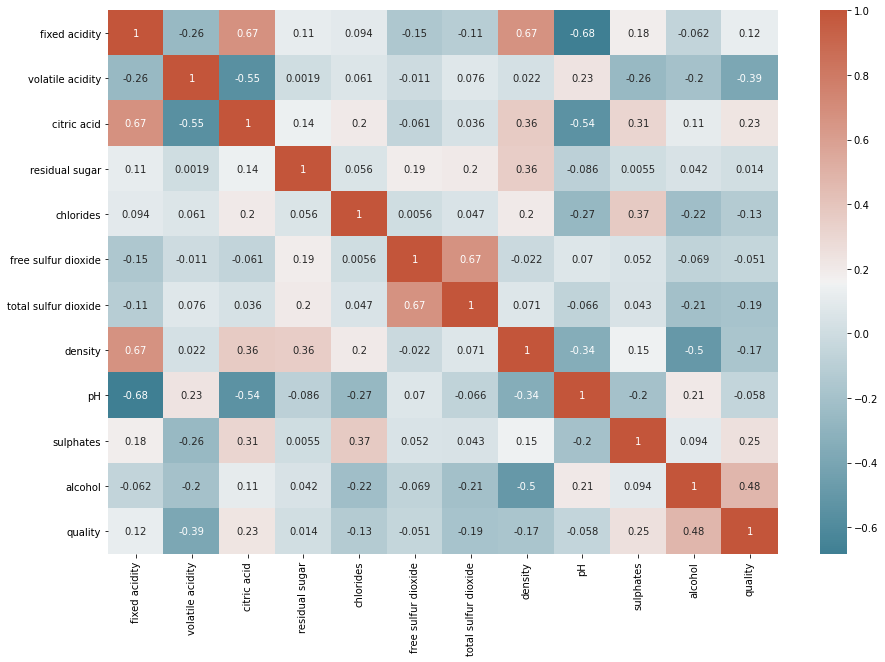

In [31]:
#correlation matrix of red
rcorr= red.corr()
plt.pyplot.subplots(figsize=(15,10))
sns.heatmap(rcorr, xticklabels= rcorr.columns, yticklabels= rcorr.columns, annot=True, cmap= sns.diverging_palette(220,20,as_cmap=True))

<AxesSubplot:>

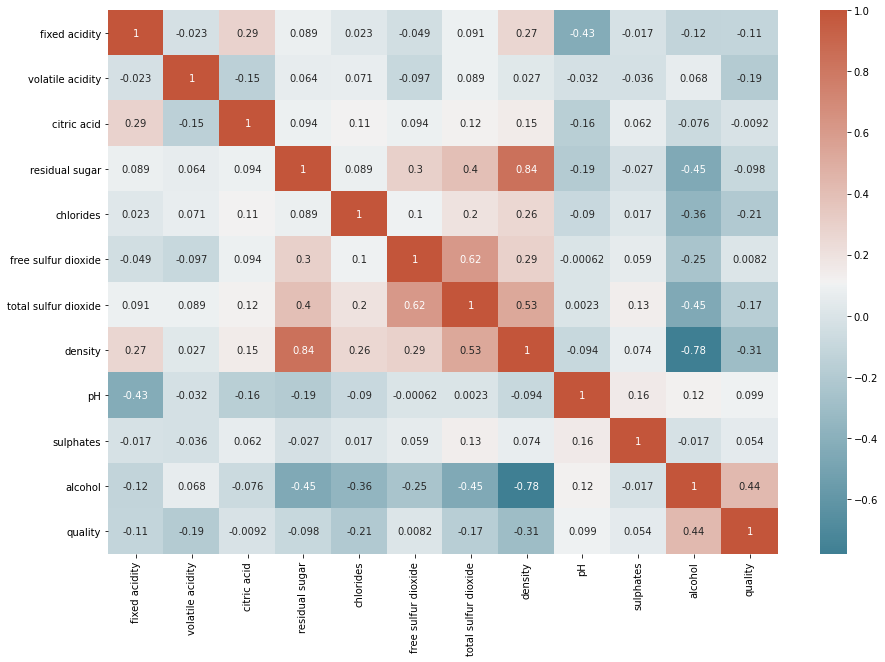

In [32]:
#correlation matrix of white
wcorr= white.corr()
plt.pyplot.subplots(figsize=(15,10))
sns.heatmap(wcorr, xticklabels= wcorr.columns, yticklabels= wcorr.columns, annot=True, cmap= sns.diverging_palette(220,20,as_cmap=True))

In [65]:
#converting the quality of red wine variable to classification variable
red['goodquality']= [1 if x>=7 else 0 for x in red['quality']]
#separating featue and target variables
Xr= red.drop(['quality', 'goodquality'], axis=1)
Yr= red['goodquality']

In [66]:
#converting the quality of white wine variable to classification variable
white['goodquality']= [1 if x>=7 else 0 for x in white['quality']]
#separating featue and target variables
Xw= white.drop(['quality', 'goodquality'], axis=1)
Yw= white['goodquality']

In [67]:
#propotions of good vs bad wine in red
red['goodquality'].value_counts()

0    1382
1     217
Name: goodquality, dtype: int64

In [68]:
#propotions of good vs bad wine in white
white['goodquality'].value_counts()

0    3838
1    1060
Name: goodquality, dtype: int64

In [69]:
#normalizing feature variables in red
from sklearn.preprocessing import StandardScaler
Xr_feautres = Xr
Xr = StandardScaler().fit_transform(Xr)
#normalizing feature variables in whhite
Xw_feautres = Xw
Xw = StandardScaler().fit_transform(Xw)

In [70]:
#splitting data into train and test sets
from sklearn.model_selection import train_test_split
Xr_train, Xr_test, Yr_train, Yr_test = train_test_split(Xr, Yr, test_size=.25, random_state=0)
Xw_train, Xw_test, Yw_train, Yw_test = train_test_split(Xw, Yw, test_size=.25, random_state=0)

In [71]:
#model: Decision Trees
#red
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

modelr= DecisionTreeClassifier(random_state=1)
modelr.fit(Xr_train, Yr_train)
Y_predr = modelr.predict(Xr_test)

print(classification_report(Yr_test, Y_predr))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       355
           1       0.53      0.73      0.62        45

    accuracy                           0.90       400
   macro avg       0.75      0.83      0.78       400
weighted avg       0.92      0.90      0.90       400



In [72]:
#model: Decision Trees
#white

modelw= DecisionTreeClassifier(random_state=1)
modelw.fit(Xw_train, Yw_train)
Y_predw = modelw.predict(Xw_test)

print(classification_report(Yw_test, Y_predw))

              precision    recall  f1-score   support

           0       0.88      0.89      0.89       963
           1       0.58      0.57      0.58       262

    accuracy                           0.82      1225
   macro avg       0.73      0.73      0.73      1225
weighted avg       0.82      0.82      0.82      1225



Decision Trees is a popular machine Learning model. The model for red wine is predicted with 90% accuracy and white wine model is predicted with 82% accuracy.

In [73]:
#Random Trees
#red
from sklearn.ensemble import RandomForestClassifier
model2r = RandomForestClassifier(random_state=1)
model2r.fit(Xr_train, Yr_train)
Yr_pred2 = model2r.predict(Xr_test)
print(classification_report(Yr_test, Yr_pred2))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       355
           1       0.68      0.58      0.63        45

    accuracy                           0.92       400
   macro avg       0.82      0.77      0.79       400
weighted avg       0.92      0.92      0.92       400



In [74]:
#Random Trees
#white

model2w = RandomForestClassifier(random_state=1)
model2w.fit(Xw_train, Yw_train)
Yw_pred2 = model2w.predict(Xw_test)
print(classification_report(Yw_test, Yw_pred2))

              precision    recall  f1-score   support

           0       0.88      0.95      0.92       963
           1       0.76      0.53      0.63       262

    accuracy                           0.86      1225
   macro avg       0.82      0.74      0.77      1225
weighted avg       0.86      0.86      0.85      1225



Random Forest is another popular ML model that build off of Decision Trees. it is more accurate than Decision Trees.The model selects the mode of all of the predictions of each decision tree. It relies on a majority-wins model, it reduces the risk of error from an individual tree.